In [1]:
# Import Matplot lib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from config import (user, password, host, port, database)

In [2]:
from sqlalchemy import create_engine, inspect
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
conn = engine.connect()


In [3]:
inspector = inspect(engine)
inspector.get_table_names()

['Department Manager',
 'Titles',
 'Salaries',
 'Employees',
 'Department Employees',
 'Departments']

In [32]:
salaries = pd.read_sql(f'SELECT * FROM "Salaries"', conn)

salaries

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


Text(0.5, 1.0, 'Salaries of Employees')

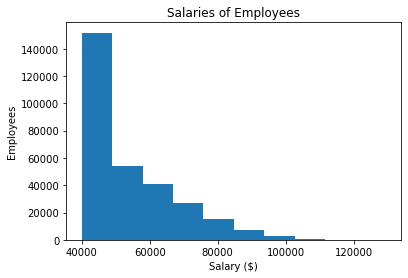

In [49]:
salary = salaries["salary"]
counts, bins = np.histogram(salary)
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel("Salary ($)")
plt.ylabel("Employees")
plt.title("Salaries of Employees")

In [35]:
titles = pd.read_sql(f'SELECT * FROM "Titles"', conn)
employees = pd.read_sql(f'SELECT * FROM "Employees"', conn)
emp_title = employees.merge(titles, how='inner', left_on=["emp_title_id"], right_on=["title_id"])
emp_title_sal = emp_title.merge(salaries, how='left', on=["emp_no"])
emp_title_sal

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,titles,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,s0001,Staff,40000
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,s0001,Staff,40000
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,s0001,Staff,56087
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,s0001,Staff,87084
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,s0001,Staff,63016
...,...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01,m0001,Manager,72446
300020,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30,m0001,Manager,71148
300021,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,m0001,Manager,60026
300022,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14,m0001,Manager,40000


In [20]:
titles_salary = emp_title_sal.groupby(["titles"])
mean_salary = titles_salary["salary"].mean()
mean_salary

titles
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

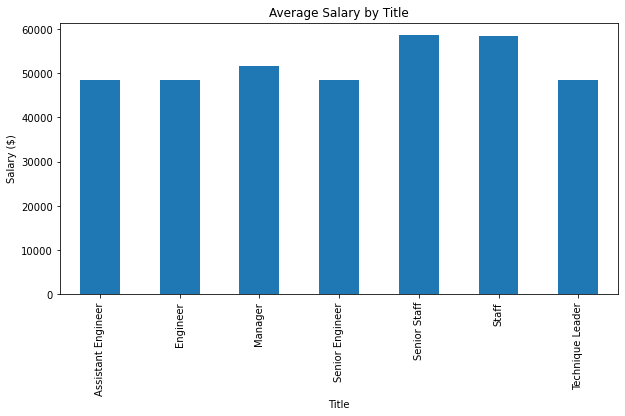

<Figure size 432x288 with 0 Axes>

In [38]:
salary_chart = mean_salary.plot(kind='bar', figsize=(10,5))
salary_chart.set_xlabel("Title")
salary_chart.set_ylabel("Salary ($)")
salary_chart.set_title("Average Salary by Title")
plt.show()
plt.tight_layout()